In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

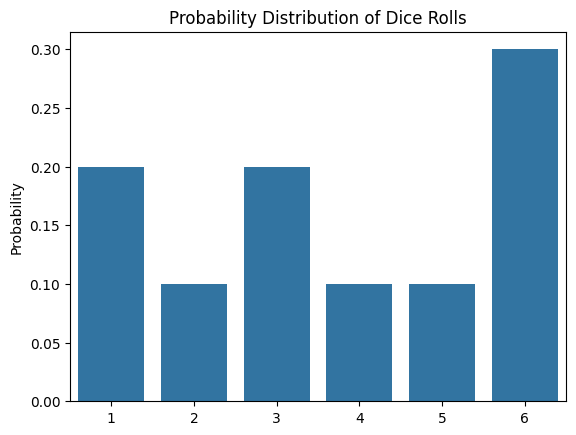

In [2]:
dice_rolls = np.array([4, 3, 6, 5, 6, 3, 1, 1, 6, 2])

faces = np.arange(1, 7)

# Calculate probability distribution
prob_dist = {face: np.mean(dice_rolls == face) for face in faces}

sns.barplot(x=list(prob_dist.keys()), y=list(prob_dist.values()))
plt.title("Probability Distribution of Dice Rolls")
plt.ylabel("Probability")
plt.show()

In [3]:
dataset = pd.read_csv("titanic.csv")
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
# Example code for probability concepts

# 1. Independence Check
# Check if coin toss outcome ('Heads' or 'Tails') is independent of survival on Titanic
# Simulate a random coin toss for each passenger (for demonstration)
np.random.seed(42)
coin = np.random.choice(['Heads', 'Tails'], size=len(dataset))

independence_check = pd.crosstab(coin, dataset['Survived'], normalize='index')
print("Independence Check (P(Survived | Coin)):")
print(independence_check)

# 2. Joint Probability
# Probability that a passenger is female AND survived
joint_prob = ((dataset['Sex'] == 'female') & (dataset['Survived'] == True)).mean()
print(f"\nJoint Probability (P(Female and Survived)): {joint_prob:.3f}")

# 3. Conditional Probability
# Probability that a passenger is female given they survived
p_female_given_survived = (dataset[dataset['Survived'] == True]['Sex'] == 'female').mean()
print(f"\nConditional Probability (P(Female | Survived)): {p_female_given_survived:.3f}")



Independence Check (P(Survived | Coin)):
Survived         0         1
row_0                       
Heads     0.593607  0.406393
Tails     0.637969  0.362031

Joint Probability (P(Female and Survived)): 0.262

Conditional Probability (P(Female | Survived)): 0.681


In [5]:

prob_survived = dataset['Survived'].mean()
print(f"Probability of survival: {prob_survived:.2f}")

prob_female = (dataset['Sex'] == 'female').mean()
print(f"Probability of being female: {prob_female:.2f}")

prob_survived_given_female = dataset[dataset['Sex'] == 'female']['Survived'].mean()
print(f"Probability of survival given female: {prob_survived_given_female:.2f}")

prob_survived_given_male = dataset[dataset['Sex'] == 'male']['Survived'].mean()
print(f"Probability of survival given male: {prob_survived_given_male:.2f}")

# In probability, "given" refers to conditional probability. For example, "probability of survival given female"-
# means the probability that a passenger survived, considering only the subset of passengers who are female.
# Mathematically, it's written as P(Survived | Female), which reads as "the probability of Survived, given Female."


Probability of survival: 0.38
Probability of being female: 0.35
Probability of survival given female: 0.74
Probability of survival given male: 0.19


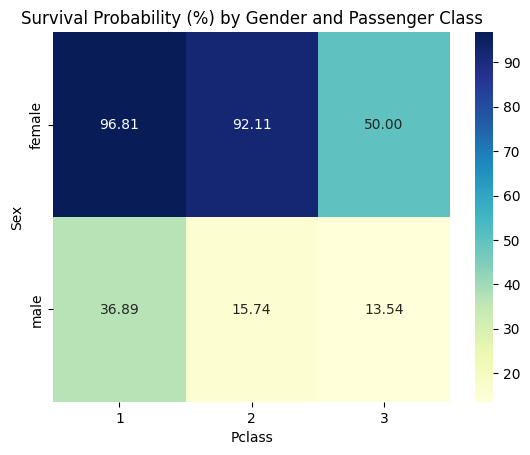

In [18]:

pivot = dataset.pivot_table(index='Sex', columns='Pclass', values='Survived', aggfunc='mean')

# Draw a heatmap of the survival rates (as percentages) for each group
sns.heatmap( pivot*100 , annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Survival Probability (%) by Gender and Passenger Class')
plt.ylabel('Sex')
plt.xlabel('Pclass')
plt.show()


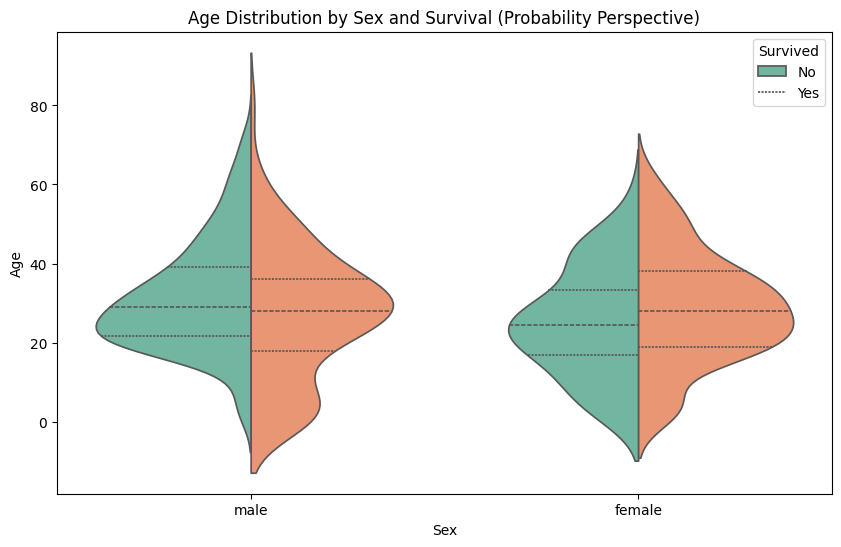

In [28]:
# interaction between Age, Sex, and Survival using a violin plot

plt.figure(figsize=(10, 6))
sns.violinplot(x='Sex', y='Age', hue='Survived', split=True, data=dataset, palette='Set2', inner='quart')
plt.title('Age Distribution by Sex and Survival (Probability Perspective)')
plt.ylabel('Age')
plt.xlabel('Sex')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()


# Probability Made Easy for Data Science

Probability helps us understand and measure uncertainty. In data science, it is used to make predictions, analyze data, and make decisions.

---

## Key Ideas

- **Random Variable:**  
    A number that comes from a random process (like rolling a dice or picking a card).

- **Probability Distribution:**  
    Shows how likely each value of a random variable is.

- **Conditional Probability:**  
    The chance of something happening, given that something else has already happened.  
    *Example:* What is the chance someone survived, given they are female?  
    *Notation:* P(A | B)

- **Independence:**  
    Two things are independent if knowing one does not change the chance of the other.  
    *Example:* Flipping two coins.

- **Joint Probability:**  
    The chance that two things happen at the same time.  
    *Notation:* P(A and B)

- **Bayes' Theorem:**  
    A formula to update probabilities when we get new information.  
    *Formula:*  
    P(A | B) = P(B | A) × P(A) / P(B)

- **Expectation (Mean):**  
    The average value you expect from a random process.

- **Variance:**  
    Tells us how spread out the values are from the average.

---

## Why Probability Matters in Data Science

- Helps estimate chances and risks
- Used in models like Naive Bayes
- Measures uncertainty in predictions
- Important for testing ideas and making decisions

---

> **In short:**  
> Probability is the foundation for understanding data, making predictions, and building smart models in data science!